### Use o aprendizado de máquina para criar um modelo que prevê quais passageiros sobreviveram ao naufrágio do Titanic.

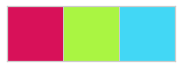

In [1]:
# Importar os módulos para análise dos dados
import pandas as pd
import numpy as np

# Importar os módulos para plot
import matplotlib as m
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar as cores dos gráficos
sns.set(style="whitegrid")
my_color_palette = ["#d81159","#aaf542", "#42d7f5"]
sns.set_palette(my_color_palette)
sns.palplot(sns.color_palette(my_color_palette))

# Configurar o tamanho e font dos gráficos
m.rcParams["figure.figsize"] = (16, 5)
m.rcParams['font.size'] = 12

# ANÁLISE

In [2]:
# Carregar os dados

dados = pd.read_csv('dataset_titanic.csv', na_values='?')

In [3]:
# Verificar o tamanho do dataset

dados.shape

(1309, 14)

In [4]:
# Verificar o nome da colunas

dados.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
# Verificar o valor do índice

dados.index

RangeIndex(start=0, stop=1309, step=1)

In [6]:
# Verificar o tipo dos dados da colunas

dados.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [7]:
# Verificar a quantidade de valores únicos

dados.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [8]:
# Verificar o início do dataset

dados.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
# Verificar o fim do dataset

dados.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [10]:
# Verificar uma amostra do dataset

dados.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
868,3,0,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,NaN,S,NaN,NaN,NaN
563,2,0,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.50,NaN,S,NaN,NaN,Cornwall
1268,3,0,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.50,NaN,S,NaN,NaN,NaN
609,3,0,"Adams, Mr. John",male,26.0,0,0,341826,8.05,NaN,S,NaN,103.0,"Bournemouth, England"
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.00,C23 C25 C27,S,10,NaN,"Winnipeg, MB"


In [11]:
# Verificar os dados estatísticos do dataset

dados.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [12]:
# Verificar as informações gerais do dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [13]:
# Vefificar os valores e os dados do dataset

# Tamanhho do dataset
tm = len(dados)
# Loop nas colunas do dataset
for cl in dados.columns:
    # Separar os valores único das colunas
    lista = list(dados[cl].unique())
    # Quebrar a lista em 30 pedaços 
    if len(lista) > 30:
        lista = lista[0:15] + ['---'] + lista[-15:]
    # Verificar o percentil de valores nulos
    qtnull = dados[cl].isnull().sum()
    print(cl,'%', round((qtnull / tm) * 100))
    print(lista)
    print()

pclass % 0
[1, 2, 3]

survived % 0
[1, 0]

name % 0
['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine', 'Allison, Mr. Hudson Joshua Creighton', 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)', 'Anderson, Mr. Harry', 'Andrews, Miss. Kornelia Theodosia', 'Andrews, Mr. Thomas Jr', 'Appleton, Mrs. Edward Dale (Charlotte Lamson)', 'Artagaveytia, Mr. Ramon', 'Astor, Col. John Jacob', 'Astor, Mrs. John Jacob (Madeleine Talmadge Force)', 'Aubart, Mme. Leontine Pauline', "Barber, Miss. Ellen 'Nellie'", 'Barkworth, Mr. Algernon Henry Wilson', '---', 'Williams, Mr. Leslie', 'Windelov, Mr. Einar', 'Wirz, Mr. Albert', 'Wiseman, Mr. Phillippe', 'Wittevrongel, Mr. Camille', 'Yasbeck, Mr. Antoni', 'Yasbeck, Mrs. Antoni (Selini Alexander)', 'Youseff, Mr. Gerious', 'Yousif, Mr. Wazli', 'Yousseff, Mr. Gerious', 'Zabour, Miss. Hileni', 'Zabour, Miss. Thamine', 'Zakarian, Mr. Mapriededer', 'Zakarian, Mr. Ortin', 'Zimmerman, Mr. Leo']

sex % 0
['female', 'ma

In [14]:
# Verificar a quantidade de valores nulos

dados.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [15]:
# Verificar a quantidade de valores nulos

dados.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<AxesSubplot:>

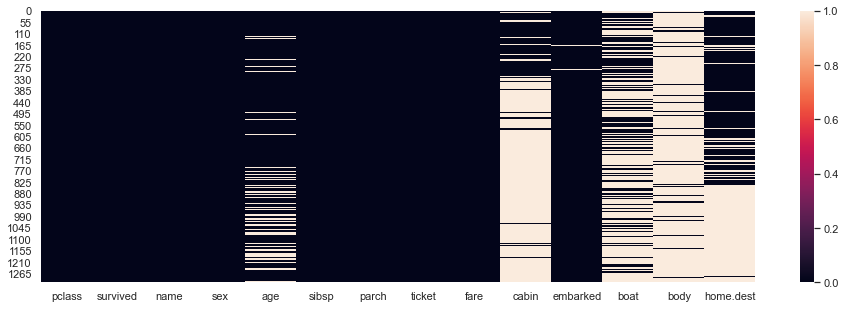

In [16]:
# Verificar os valores nulos

sns.heatmap(dados.isnull())

In [17]:
# Colunas que deverão ser excluídas

colunas_excluir = ['name', 'cabin', 'boat', 'body', 'home.dest']

In [18]:
# Verificar os valores da variável target

dados['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [19]:
# Verificar a coluna ticket

len(dados['ticket'].unique())

929

In [20]:
# Verificar a quantidade de ticket por classe

dados.groupby(['ticket', 'pclass'])['pclass'].count()

ticket       pclass
110152       1         3
110413       1         3
110465       1         2
110469       1         1
110489       1         1
                      ..
W./C. 6608   3         5
W./C. 6609   3         1
W.E.P. 5734  1         2
W/C 14208    2         1
WE/P 5735    1         2
Name: pclass, Length: 929, dtype: int64

In [21]:
# Verificar o ticket com quantidade > 1

dados[dados['ticket'] == '110152']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
67,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S,8,NaN,"London, England"
195,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S,8,NaN,NaN
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,8,NaN,"London Vancouver, BC"


In [22]:
# Verificar o ticket com quantidade > 1

dados[dados['ticket'] == '110413']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
289,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S,8,NaN,"New York, NY"
290,1,0,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S,NaN,NaN,"New York, NY"
291,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,8,NaN,"New York, NY"


In [23]:
# Verificar o ticket com quantidade > 1

dados[dados['ticket'] == 'W./C. 6608']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
806,3,0,"Ford, Miss. Doolina Margaret 'Daisy'",female,21.0,2,2,W./C. 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
807,3,0,"Ford, Miss. Robina Maggie 'Ruby'",female,9.0,2,2,W./C. 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
809,3,0,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
810,3,0,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
811,3,0,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"


In [24]:
# Verificar o ticket com quantidade > 1

dados[dados['ticket'] == '110465']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
74,1,0,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0,A14,S,NaN,NaN,"Stoughton, MA"
232,1,0,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0,C110,S,NaN,207.0,"Worcester, MA"


In [25]:
# Criar um grupo para os ticket

ax = dados['ticket'].value_counts()
dicticket = {}
for idx, vl in zip(ax.index, ax.values):
    dicticket[idx] = vl
    
# Criar a coluna para os valores criado
dados['ticket_count'] = dados['ticket'].apply(lambda x: dicticket[x])

# PRÉ-PROCESSAMENTO

In [26]:
# Importar dados para pré-processamento

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [27]:
# Preencher os valores nulos com a média para a coluna age e fare

# Cria o objeto
imputerN = SimpleImputer(strategy='mean')

# Preenche a coluna com os valores médios
dados['age'] = imputerN.fit_transform(dados[['age']])

# Preenche a coluna com os valores médios
dados['fare'] = imputerN.fit_transform(dados[['fare']])

In [28]:
# Cria o objeto
imputerT = SimpleImputer(strategy='most_frequent')

# Preenche a coluna com os valores mais fruquente
dados['embarked'] = imputerT.fit_transform(dados[['embarked']])

In [29]:
# Cria uma categoria para a coluna fare

lsitabins = np.linspace(0, 550, 6)
dados['fare_grupo'] = pd.cut(dados['fare'], bins=lsitabins)

In [30]:
# Codificar a coluna sex

dados['sex'] = dados['sex'].apply(lambda x: 1 if x == 'male' else 0)

In [31]:
# Exluir colunas do dataset

dados = dados.drop(colunas_excluir, axis=1)

In [32]:
# Vefificar o pré-processamento

dados.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,ticket_count,fare_grupo
0,1,1,0,29.0000,0,0,24160,211.3375,S,4,"(110.0, 220.0]"
1,1,1,1,0.9167,1,2,113781,151.5500,S,6,"(110.0, 220.0]"
2,1,0,0,2.0000,1,2,113781,151.5500,S,6,"(110.0, 220.0]"
3,1,0,1,30.0000,1,2,113781,151.5500,S,6,"(110.0, 220.0]"
4,1,0,0,25.0000,1,2,113781,151.5500,S,6,"(110.0, 220.0]"


# ANÁLISE GRÁFICA

In [33]:
# Verificar a correlação das colunas

dados.corr()

,pclass,survived,sex,age,sibsp,parch,fare,ticket_count
pclass,1.000000,-0.312469,0.124617,-0.366370,0.060832,0.018322,-0.558477,-0.078554
survived,-0.312469,1.000000,-0.528693,-0.050199,-0.027825,0.082660,0.244208,0.075293
sex,0.124617,-0.528693,1.000000,0.057398,-0.109609,-0.213125,-0.185484,-0.172765
age,-0.366370,-0.050199,0.057398,1.000000,-0.190747,-0.130872,0.171521,-0.155071
sibsp,0.060832,-0.027825,-0.109609,-0.190747,1.000000,0.373587,0.160224,0.679444
parch,0.018322,0.082660,-0.213125,-0.130872,0.373587,1.000000,0.221522,0.647029
fare,-0.558477,0.244208,-0.185484,0.171521,0.160224,0.221522,1.000000,0.478870
ticket_count,-0.078554,0.075293,-0.172765,-0.155071,0.679444,0.647029,0.478870,1.000000


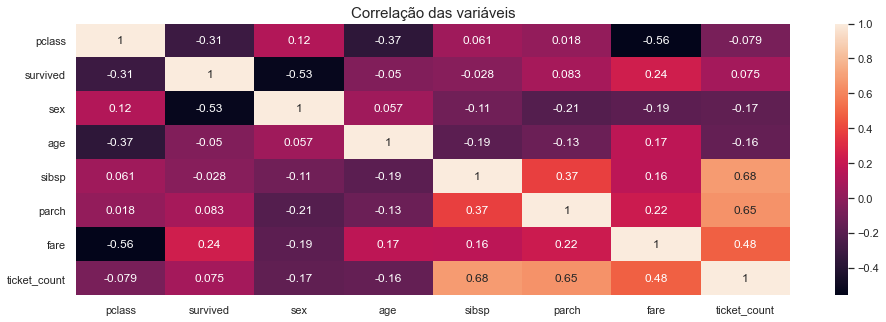

In [34]:
# Plot gráficos do dataset para análise

fig, ax = plt.subplots()
plt.title("Correlação das variáveis", fontsize=15)
sns.heatmap(dados.corr(), annot=True)
plt.show()

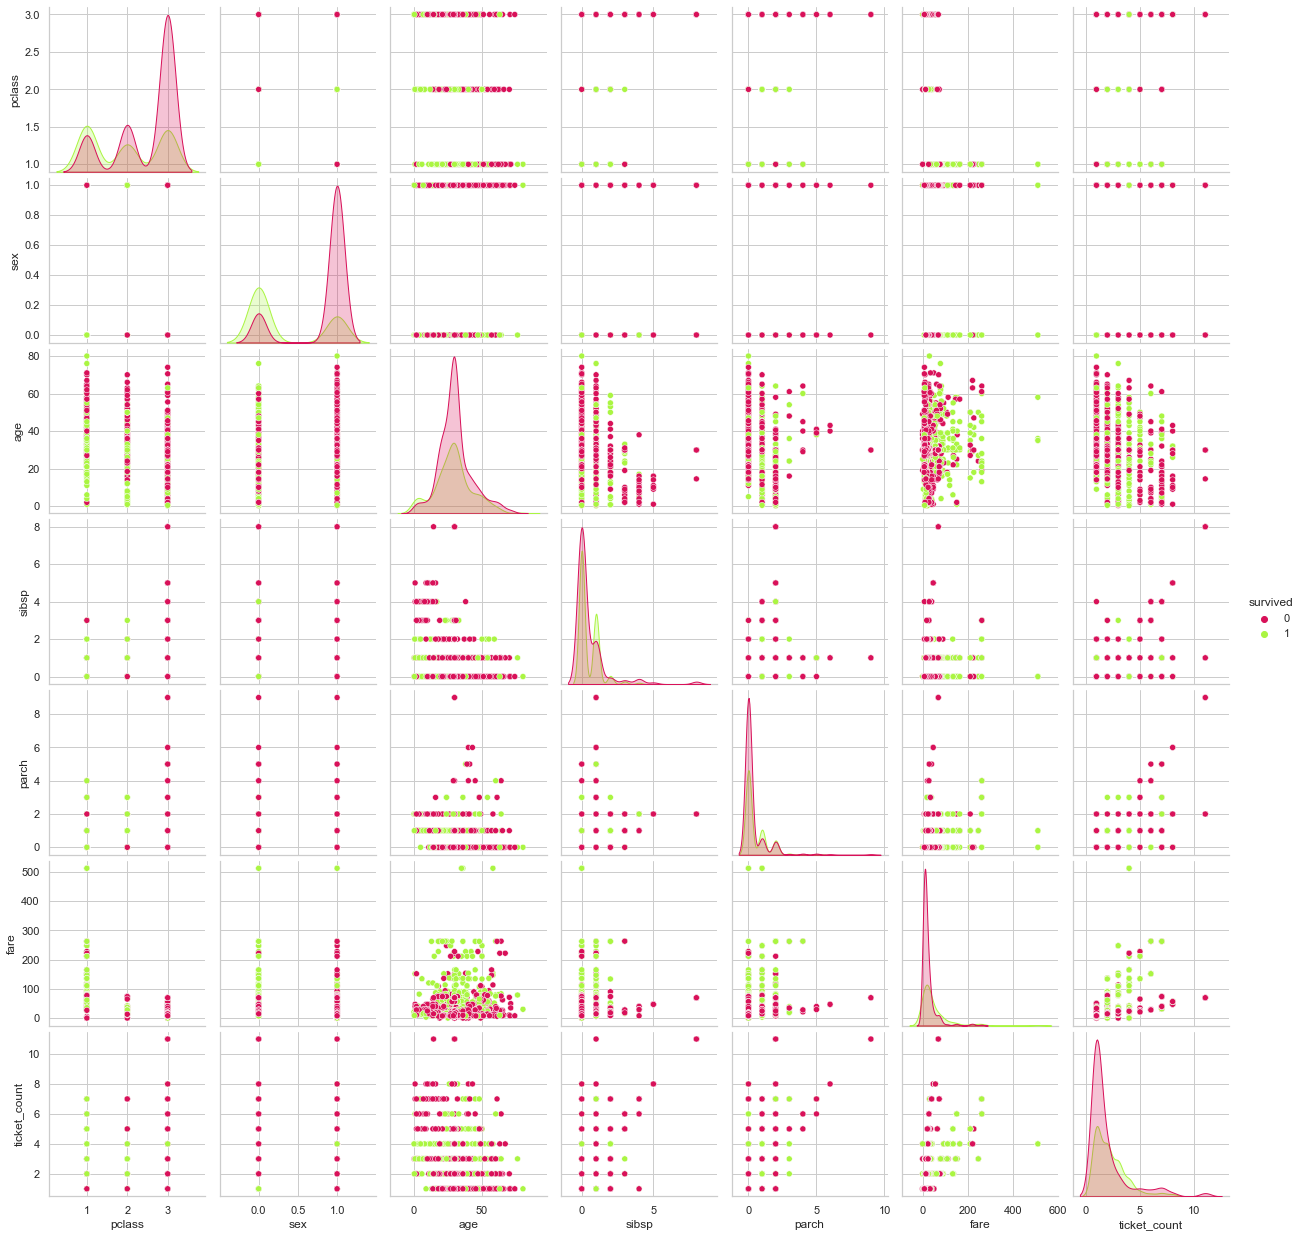

In [35]:
# Verificar o gráfico (pairplot) das variáveis

sns.pairplot(dados, hue='survived')

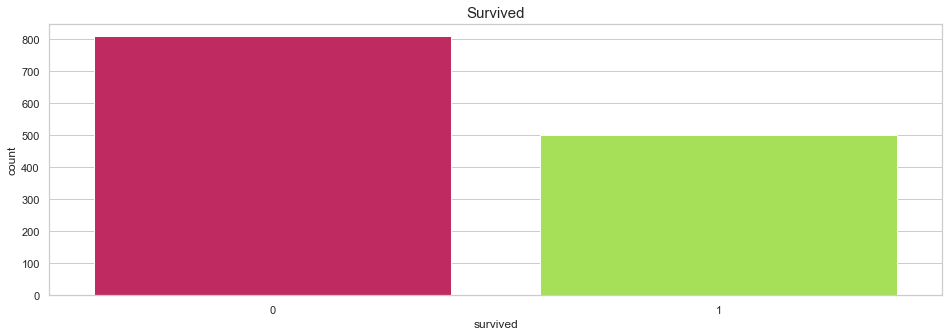

In [36]:
fig, ax = plt.subplots()
plt.title("Survived", fontsize=15)
sns.countplot(x='survived', data=dados)
plt.show()

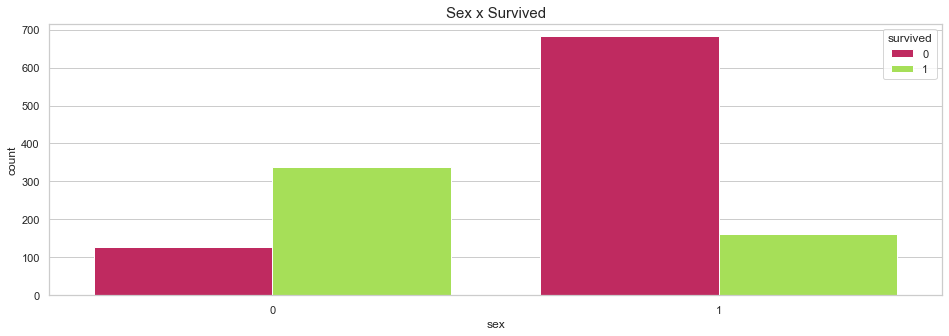

In [37]:
fig, ax = plt.subplots()
plt.title("Sex x Survived", fontsize=15)
sns.countplot(x='sex', data=dados, hue='survived')
plt.show()

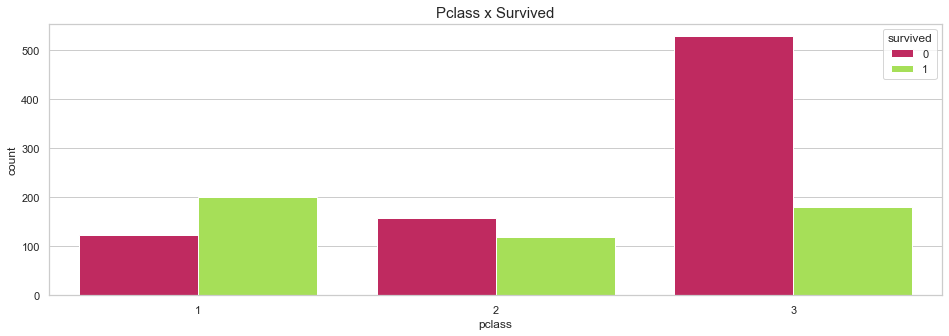

In [38]:
fig, ax = plt.subplots()
plt.title("Pclass x Survived", fontsize=15)
sns.countplot(x='pclass', data=dados, hue='survived')
plt.show()

[]

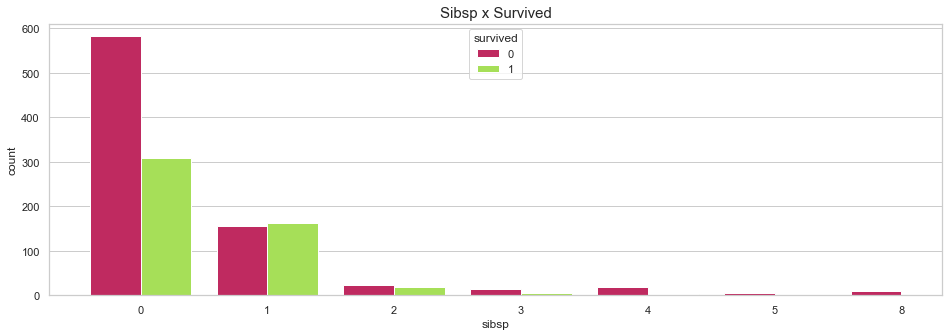

In [39]:
fig, ax = plt.subplots()
plt.title("Sibsp x Survived", fontsize=15)
sns.countplot(x='sibsp', data=dados, hue='survived')
plt.plot()

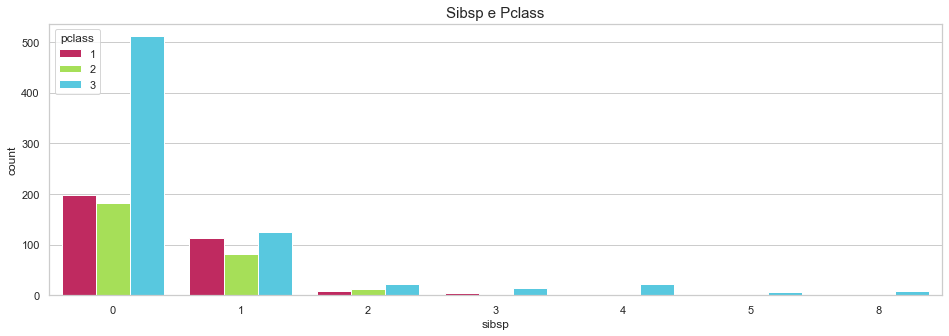

In [40]:
fig, ax = plt.subplots()
plt.title("Sibsp e Pclass", fontsize=15)
sns.countplot(x='sibsp', data=dados, hue='pclass')
plt.show()

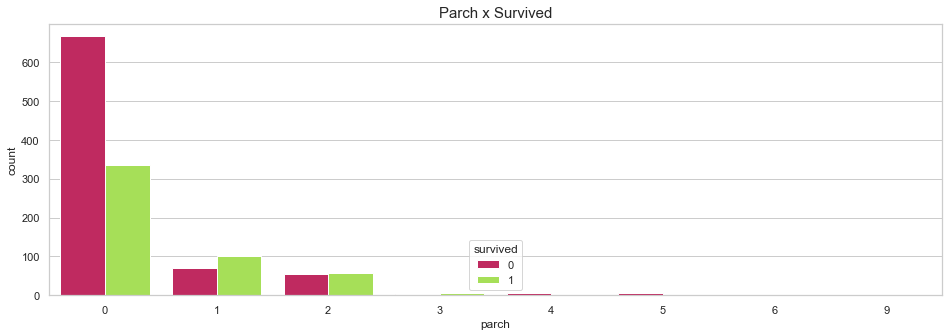

In [41]:
fig, ax = plt.subplots()
plt.title("Parch x Survived", fontsize=15)
sns.countplot(x='parch', data=dados, hue='survived')
plt.show()

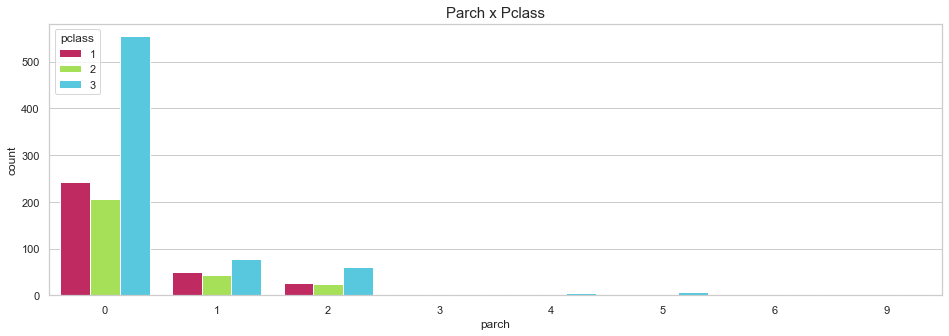

In [42]:
fig, ax = plt.subplots()
plt.title("Parch x Pclass", fontsize=15)
sns.countplot(x='parch', data=dados, hue='pclass')
plt.show()

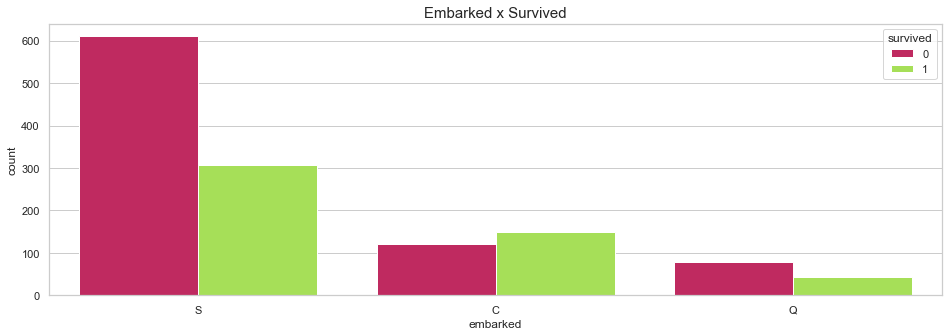

In [43]:
fig, ax = plt.subplots()
plt.title("Embarked x Survived", fontsize=15)
sns.countplot(x='embarked', data=dados, hue='survived')
plt.show()

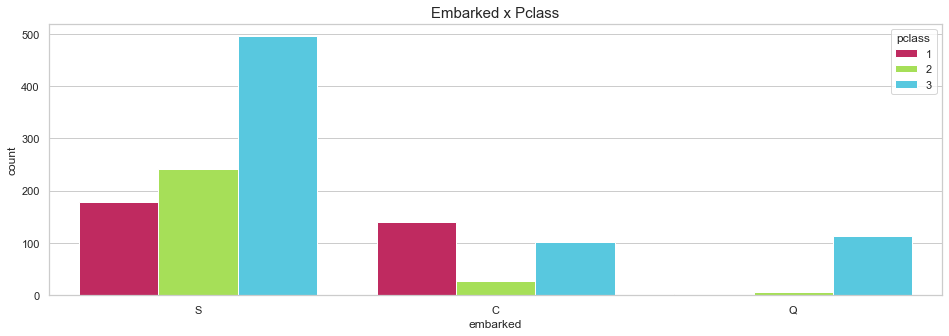

In [44]:
fig, ax = plt.subplots()
plt.title("Embarked x Pclass", fontsize=15)
sns.countplot(x='embarked', data=dados, hue='pclass')
plt.show()

In [45]:
# Criar uma categoria para embarked

dicembarked = {'Q': 2, 'C': 1, 'S':1}

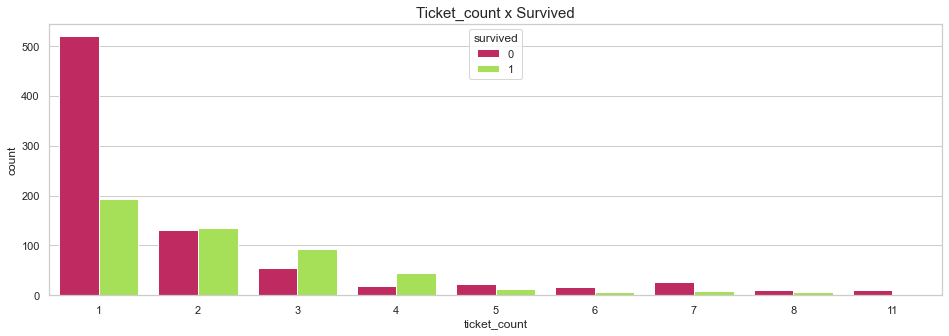

In [46]:
fig, ax = plt.subplots()
plt.title("Ticket_count x Survived", fontsize=15)
sns.countplot(x='ticket_count', data=dados, hue='survived')
plt.show()

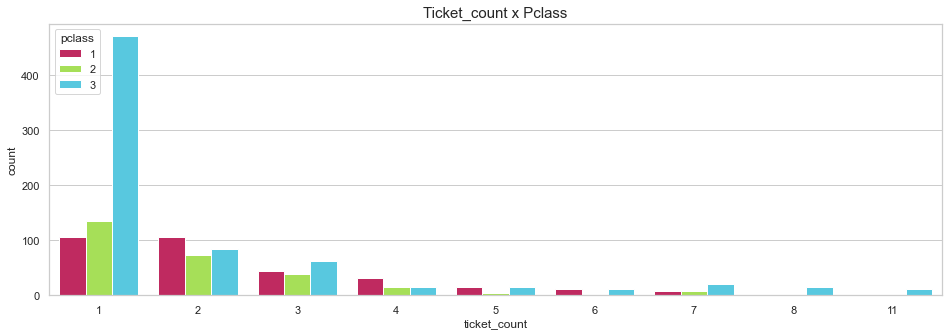

In [47]:
fig, ax = plt.subplots()
plt.title("Ticket_count x Pclass", fontsize=15)
sns.countplot(x='ticket_count', data=dados, hue='pclass')
plt.show()

<AxesSubplot:title={'center':'Histograma Age x Sex'}, xlabel='age', ylabel='Count'>

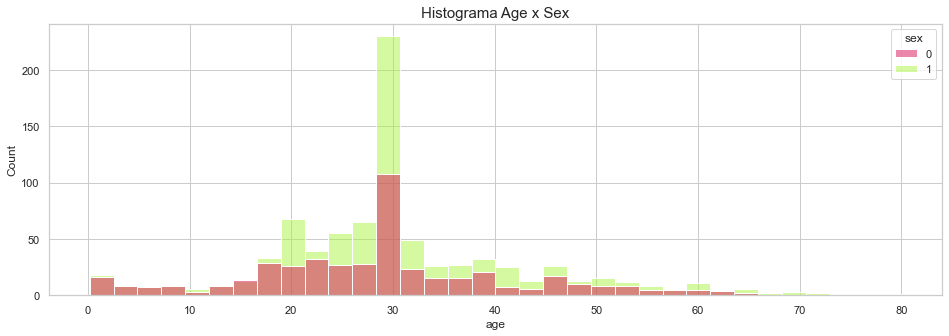

In [48]:
fig, ax = plt.subplots()
plt.title("Histograma Age x Sex", fontsize=15)
sns.histplot(data=dados, x='age', hue='sex')

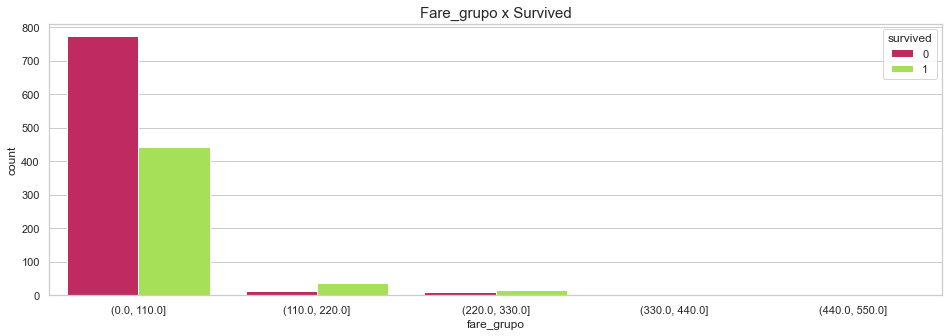

In [49]:
fig, ax = plt.subplots()
plt.title("Fare_grupo x Survived", fontsize=15)
sns.countplot(x='fare_grupo', data=dados, hue='survived')
plt.show()

# PRÉ-PROCESSAMENTO

In [50]:
# Verificar o dataset

dados.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,ticket_count,fare_grupo
0,1,1,0,29.0000,0,0,24160,211.3375,S,4,"(110.0, 220.0]"
1,1,1,1,0.9167,1,2,113781,151.5500,S,6,"(110.0, 220.0]"
2,1,0,0,2.0000,1,2,113781,151.5500,S,6,"(110.0, 220.0]"
3,1,0,1,30.0000,1,2,113781,151.5500,S,6,"(110.0, 220.0]"
4,1,0,0,25.0000,1,2,113781,151.5500,S,6,"(110.0, 220.0]"


In [51]:
# Importar dados para pré-processamento

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [52]:
# Criar o objeto

processamento = LabelEncoder()

# Preenche a coluna com os valores médios
dados['fare_grupo'] = processamento.fit_transform(dados['fare_grupo'])

In [53]:
# Criar o objeto

processamento = StandardScaler()

# Preenche a coluna age
dados['age'] = processamento.fit_transform(dados[['age']])

In [54]:
# Codifica a coluna embarked

dados['embarked'] = dados['embarked'].apply(lambda x: dicembarked[x])

In [55]:
# Verificação final do dataset

dados.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,ticket_count,fare_grupo
0,1,1,0,-0.068420,0,0,24160,211.3375,1,4,1
1,1,1,1,-2.249092,1,2,113781,151.5500,1,6,1
2,1,0,0,-2.164974,1,2,113781,151.5500,1,6,1
3,1,0,1,0.009230,1,2,113781,151.5500,1,6,1
4,1,0,0,-0.379021,1,2,113781,151.5500,1,6,1


In [56]:
# Excluiu as colunas fare, ticket

dados.drop(['fare', 'ticket'], axis=1, inplace=True)

In [57]:
# Verificação final do dataset

dados.head()

,pclass,survived,sex,age,sibsp,parch,embarked,ticket_count,fare_grupo
0,1,1,0,-0.068420,0,0,1,4,1
1,1,1,1,-2.249092,1,2,1,6,1
2,1,0,0,-2.164974,1,2,1,6,1
3,1,0,1,0.009230,1,2,1,6,1
4,1,0,0,-0.379021,1,2,1,6,1


# CRIANDO MODELO DE ML

In [64]:
# Importa os módulos de ML

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

# Cria o modelo de ML

def modelosML(dados):
    # Divide o dataset
    x = dados.drop('survived', axis=1)
    y = dados['survived']
    
    # Variável com os modelos de ML 
    modelos = [('LR', LogisticRegression()),
               ('Árvore', DecisionTreeClassifier()),
                ('Floresta', RandomForestClassifier())]
    
    # Variável para guardar os resultados
    dicretorno = {}
    # Loop na variável modelos
    for nome, md in modelos:
        scoreax = cross_val_score(md, x, y, cv=10)
        dicretorno[nome] = scoreax
        
    return dicretorno

<AxesSubplot:>

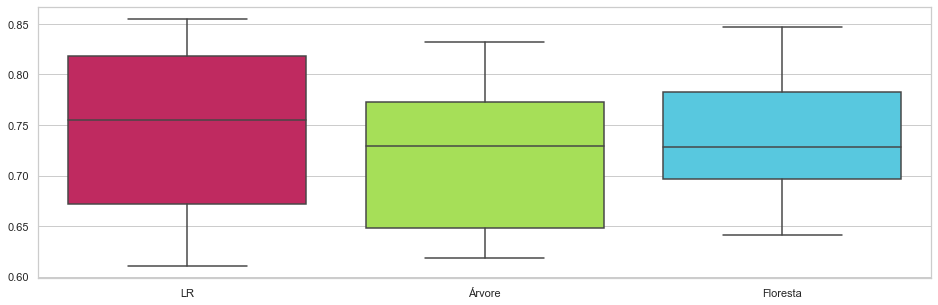

In [59]:
# Treinando o modelo

valor = modelosML(dados) 
sns.boxplot(data = pd.DataFrame(valor))

<AxesSubplot:>

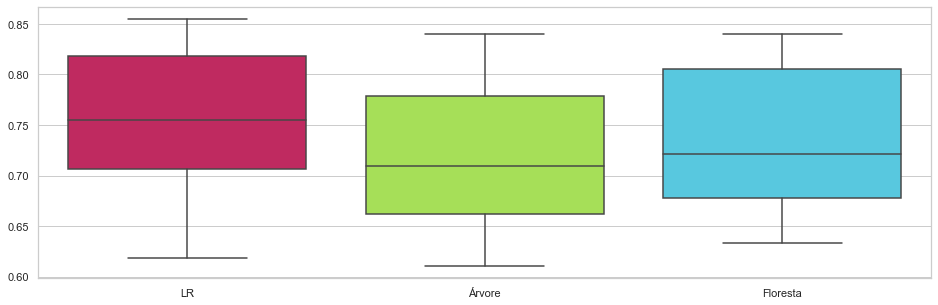

In [61]:
# Treinando o modelo sem coluna 'embarked'

valor = modelosML(dados.drop('embarked', axis=1)) 
sns.boxplot(data = pd.DataFrame(valor))

<AxesSubplot:>

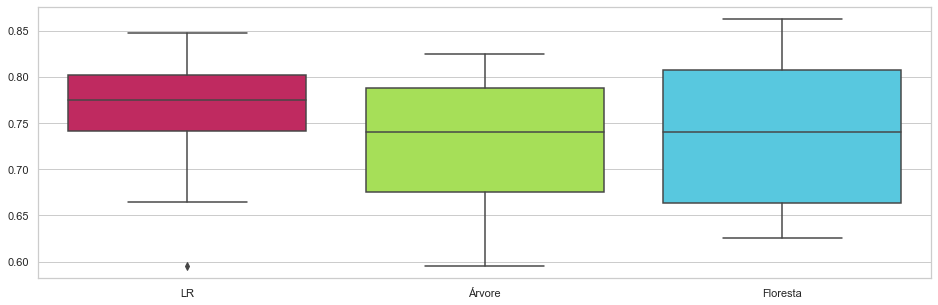

In [62]:
# Treinando o modelo sem as colunas sibsp, parch, embarked

valor = modelosML(dados.drop(['sibsp', 'parch', 'embarked'], axis=1)) 
sns.boxplot(data = pd.DataFrame(valor))

<AxesSubplot:>

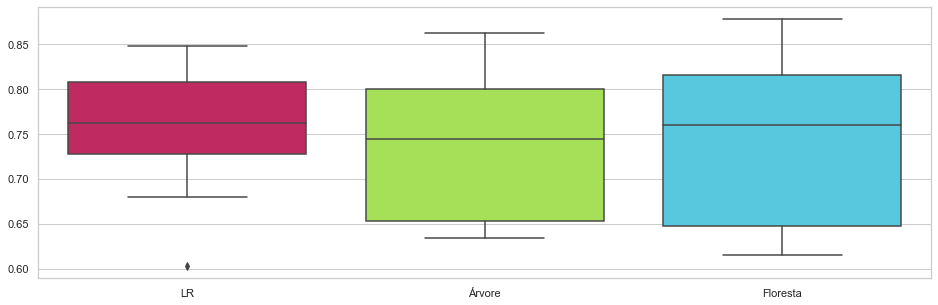

In [63]:
# Treinando o modelo sem as colunas sibsp, parch, embarked, ticket_count, tare_grupo

valor = modelosML(dados.drop(['sibsp', 'parch', 'embarked', 'ticket_count', 'fare_grupo'], axis=1)) 
sns.boxplot(data = pd.DataFrame(valor))